In [50]:
from sklearn.datasets import make_classification
from sklearn import preprocessing
import pandas as pd
import numpy as np
import re
# import tensorflow as tf

In [123]:
data = pd.read_csv('data/GTPD_bike_data.csv')
drop_cols = [x for x in data.columns.values if x.startswith('Unnamed')]
bad_cols = [
    'LocationDirectional',
    'CaseDisposition',
    'LocationLatitude',
    'LocationLongitude',
    'LocationStreet'
]
drop_cols += bad_cols
data.drop(drop_cols, axis=1, inplace=True)
data = data.fillna('...')
data

,IncidentFromDate,IncidentFromTime,IncidentToDate,IncidentToTime,CaseStatus,LocationCode,PatrolZone,LocationLandmark,LocationStreetNumber
0,01/13/2013,18:00:00,01/14/2013,13:00:00,Inactive,NONCAM,Z2,Theta XI Fraternity 329A Z2,777
1,02/06/2013,23:00:00,02/07/2013,12:00:00,Inactive,ONCAM,Z2,Delta Chi Fraternity,170
2,02/14/2013,11:00:00,02/21/2013,09:30:00,Inactive,ONCAM,Z2,Harrison Residence Hall 14 Z2,660
3,02/26/2013,21:00:00,02/27/2013,08:30:00,Inactive,ONCAM,Z4,Hefner Residence Hall,510
4,02/27/2013,22:00:00,03/04/2013,08:00:00,Inactive,ONCAM,Z2,Towers Residence Hall,112
5,03/04/2013,18:00:00,03/04/2013,20:45:00,Inactive,ONCAM,Z3,Van Leer Building,777
6,03/04/2013,22:00:00,03/05/2013,10:30:00,Closed/Cleared,ONCAM,Z2,North Avenue North Parking Deck,120
7,04/02/2013,21:00:00,04/03/2013,10:00:00,Inactive,ONCAM,Z2,North Avenure Apartments North,120
8,04/27/2013,05:38:00,04/27/2013,06:09:00,Closed/Cleared,ONCAM,Z2,North Avenue Apartments,120
9,05/01/2013,09:30:00,05/01/2013,18:34:00,Inactive,ONCAM,Z1,Centennial Research Building,400


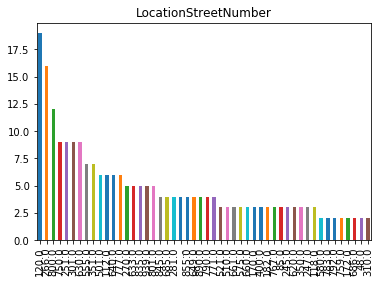

In [124]:
import matplotlib.pyplot as plt
pd.value_counts(data['LocationStreetNumber'])[:50].plot.bar()
plt.title('LocationStreetNumber')
plt.show()

In [125]:
'''
TODO:

**msg me if you have questions**

1. convert incidentfromdates to months - disregard year - one-hot encode
2. convert incidenttodate to months - disregard year - one-hot-encode
3. tokenize incidentfromtime && incidenttotime- one-hot encode
4. one-hot encode casestatus
5. one-hot encode locationcode
6. clean out locationlandmark
    - remove all: numbers, (SST), symbols, etc
    - one-hot encode
7. one-hot encode locationstreetnumber
8. one-hot encode locationstreet
'''

'\nTODO:\n\n**msg me if you have questions**\n\n1. convert incidentfromdates to months - disregard year - one-hot encode\n2. convert incidenttodate to months - disregard year - one-hot-encode\n3. tokenize incidentfromtime && incidenttotime- one-hot encode\n4. one-hot encode casestatus\n5. one-hot encode locationcode\n6. clean out locationlandmark\n    - remove all: numbers, (SST), symbols, etc\n    - one-hot encode\n7. one-hot encode locationstreetnumber\n8. one-hot encode locationstreet\n'

In [126]:
# Clean from and to date data
def return_month(data):
    data = data.split('/')[0]
    if data[0] == '0':
        data = data[1:]
    return data

data['IncidentFromDate'] = data.apply(lambda row: return_month(row['IncidentFromDate']), axis=1)
data['IncidentToDate'] = data.apply(lambda row: return_month(row['IncidentToDate']), axis=1)

In [127]:
# Clean to and from time
def return_hour(data):
    data = data.split(':')[0]
    if data[0] == '0':
        data = data[1:]
    return data

data['IncidentFromTime'] = data.apply(lambda row: return_hour(row['IncidentFromTime']), axis=1)
data['IncidentToTime'] = data.apply(lambda row: return_hour(row['IncidentToTime']), axis=1)

In [128]:
# Clean location landmark data, along with case status and location street
data['LocationLandmark'] = data['LocationLandmark'].str.replace(r"\(.*\)","")
data['LocationLandmark'] = data['LocationLandmark'].str.replace(r"\d+", "")
data['LocationLandmark'] = data['LocationLandmark'].str.replace(' Z', '')
data['LocationLandmark'] = data['LocationLandmark'].str.upper()
data['CaseStatus'] = data['CaseStatus'].str.upper()
data['LocationStreetNumber'] = data['LocationStreetNumber'].astype(str)
data.head()

,IncidentFromDate,IncidentFromTime,IncidentToDate,IncidentToTime,CaseStatus,LocationCode,PatrolZone,LocationLandmark,LocationStreetNumber
0,1,18,1,13,INACTIVE,NONCAM,Z2,THETA XI FRATERNITY A,777.0
1,2,23,2,12,INACTIVE,ONCAM,Z2,DELTA CHI FRATERNITY,170.0
2,2,11,2,9,INACTIVE,ONCAM,Z2,HARRISON RESIDENCE HALL,660.0
3,2,21,2,8,INACTIVE,ONCAM,Z4,HEFNER RESIDENCE HALL,510.0
4,2,22,3,8,INACTIVE,ONCAM,Z2,TOWERS RESIDENCE HALL,112.0
5,3,18,3,20,INACTIVE,ONCAM,Z3,VAN LEER BUILDING,777.0
6,3,22,3,10,CLOSED/CLEARED,ONCAM,Z2,NORTH AVENUE NORTH PARKING DECK,120.0
7,4,21,4,10,INACTIVE,ONCAM,Z2,NORTH AVENURE APARTMENTS NORTH,120.0
8,4,5,4,6,CLOSED/CLEARED,ONCAM,Z2,NORTH AVENUE APARTMENTS,120.0
9,5,9,5,18,INACTIVE,ONCAM,Z1,CENTENNIAL RESEARCH BUILDING,400.0


In [130]:
one_hot_data = pd.get_dummies(data)

,IncidentFromDate_1,IncidentFromDate_10,IncidentFromDate_11,IncidentFromDate_12,IncidentFromDate_2,IncidentFromDate_3,IncidentFromDate_4,IncidentFromDate_5,IncidentFromDate_6,IncidentFromDate_7,...,LocationStreetNumber_831.0,LocationStreetNumber_835.0,LocationStreetNumber_84.0,LocationStreetNumber_845.0,LocationStreetNumber_85.0,LocationStreetNumber_855.0,LocationStreetNumber_890.0,LocationStreetNumber_900.0,LocationStreetNumber_939.0,LocationStreetNumber_950.0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
make_classification(n_samples=25, features=10)

TypeError: make_classification() got an unexpected keyword argument 'features'